Web Scraping

In [ ]:
import pandas as pd
from collections import defaultdict
from bs4 import BeautifulSoup as bs
import requests

In [ ]:
teams = ["ATL", "BOS", "NJN", "CHA", "CHI", "CLE", "DAL", "DEN", "DET", "GSW", "HOU", "IND", "LAC", "LAL", "MEM", "MIA", "MIL", "MIN", "NOH", "NYK", "OKC", "ORL", "PHI", "PHO", "POR",  "SAC", "SAS", "TOR", "UTA", "WAS"] #Currently ATL is missing as that was added above
#teams = ["ATL", "BOS", "NJN", "CHA", "CHI", "CLE","DAL", "DEN", "DET", "GSW", "HOU"]
#teams = ["ATL", "BOS", "NJN"]
df = pd.DataFrame()
for team in teams:
    url = "https://www.basketball-reference.com/teams/" + team + "/"
    html = requests.get(url)
    soup = bs(html.content)
    specifier = "#" + team + " > tbody"
    body = soup.select(specifier)
    rows = body[0].select('tr')
    team_data = []
    data = defaultdict(list)
    cols = ['Lg','Team','W','L','W/L%','Finish','SRS','Pace','Rel Pace','ORtg','Rel ORtg','DRtg','Rel DRtg','Playoffs','Coaches','Top WS']

    for row in rows:
        data['season'].append(row.select('th')[0].text)
        temp = row.select('td')
        temp.pop(7)
        temp.pop(13)
        for i in range(len(cols)):
            data[cols[i]].append(temp[i].text)
    team_data = pd.DataFrame(data)
    df = pd.concat([df, team_data])
print(df.head(5))
print(df.tail(5))
df.to_csv(r"C:\Users\ofior\Documents\4185", sep = "\t", encoding = "utf-8")

In [4]:
import pandas as pd
df = pd.read_csv(r'bball_data.csv')
df.isnull().sum()
#print("----")

Unnamed: 0      0
season          0
Lg              0
Team            0
W               0
L               0
W/L%            0
Finish          0
SRS             0
Pace           20
Rel Pace       20
ORtg           20
Rel ORtg       20
DRtg           20
Rel DRtg       20
Playoffs      656
Coaches         0
Top WS          0
dtype: int64

In [118]:
df = pd.read_csv(r'bball_data.csv')
list(df.columns)
df.columns = [c.replace(' ', '_') for c in df.columns]
#print(len(df["DRtg"]))
#print(len(df["ORtg"]))
avg = lambda row: (row.ORtg - row.DRtg)
col1 = df.apply(avg, axis =1)
df = df.assign(TRtg=col1.values)

df.columns = df.columns.str.replace("W/L%", "W_L_Pct")
wins = lambda row: ((row.W_L_Pct) * 82)
per = df.apply(wins, axis = 1)
df = df.assign(WP82G = per.values)

df = df.drop(df.columns[[0]], axis = 1)


#df.head(5)
df["Top_WS"] = df["Top_WS"].str.replace('(',',')
df["Top_WS"] = df["Top_WS"].str.replace(')','')

df["Playoffs"] = df["Playoffs"].fillna('No')
df = df.loc[df["season"] != "2022-23"]
df = df.dropna(axis = 0)
df.head(5)
df.isnull().sum()
df = df.loc[df["season"] != "2022-23"]


C:\Users\ofior\AppData\Local\Temp\ipykernel_29048\980223198.py:19: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Top_WS"] = df["Top_WS"].str.replace('(',',')
C:\Users\ofior\AppData\Local\Temp\ipykernel_29048\980223198.py:20: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df["Top_WS"] = df["Top_WS"].str.replace(')','')


In [68]:
#college_df[["Town", "State"]] = college_df['college_location'].str.split(',', expand=True)
#df["Top_Player"] = ""
#df["WS"] = ""
#df[["Top_Player", "WS"]] == df["Top_WS"].str.split(',', expand=True)

In [119]:
df.to_csv("bball_cleaned.csv")

Drops the values for the 2022-2023 season.  Basketball Reference is constantly updated meaning that while working on this project, data could be inputted that could change models, graphs, etc.  Additionally as we are relatively early through the 2022-2023 season (only around 25 games), the data will be excluded because of its smaller sample size.  Metrics such as offensive and defensive efficiency on a smaller sample size may be more extreme because of the smaller sample size.  A team that has played weak teams through only 25 games and played really well, may appear to be better than they actually are.  Thus their wins through roughly a quarter of the season would make up a disproportionate amount of their total wins (ex: 25% of the season accounting for 40% of their season wins).

In [178]:
df = pd.read_csv("bball_cleaned.csv")
#df.head(5)
df = df.drop(df.columns[[0]], axis = 1)
df.head()

,season,Lg,Team,W,L,W_L_Pct,Finish,SRS,Pace,Rel_Pace,ORtg,Rel_ORtg,DRtg,Rel_DRtg,Playoffs,Coaches,Top_WS,TRtg,WP82G
0,2021-22,NBA,Atlanta Hawks*,43,39,0.524,2nd of 5,1.55,97.7,-0.5,116.5,4.5,114.9,2.9,Lost E. Conf. 1st Rnd.,N. McMillan (43-39),"T. Young ,10.0",1.6,42.968
1,2020-21,NBA,Atlanta Hawks*,41,31,0.569,1st of 5,2.14,97.6,-1.6,115.7,3.4,113.3,1.0,Lost E. Conf. Finals,"L. Pierce (14-20), N. McMillan (27-11)","C. Capela ,8.2",2.4,46.658
2,2019-20,NBA,Atlanta Hawks,20,47,0.299,5th of 5,-7.71,103.0,2.7,107.2,-3.4,114.8,4.2,No,L. Pierce (20-47),"T. Young ,5.9",-7.6,24.518
3,2018-19,NBA,Atlanta Hawks,29,53,0.354,5th of 5,-6.06,103.9,3.9,108.1,-2.3,113.9,3.5,No,L. Pierce (29-53),"J. Collins ,6.0",-5.8,29.028
4,2017-18,NBA,Atlanta Hawks,24,58,0.293,5th of 5,-5.30,98.3,1.0,105.0,-3.6,110.6,2.0,No,M. Budenholzer (24-58),"J. Collins ,5.4",-5.6,24.026


In [179]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ofior\AppData\Local\Temp\ipykernel_29048\58359773.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<AxesSubplot: >

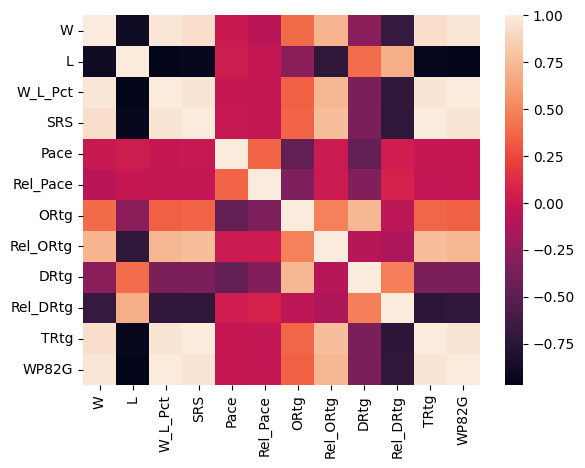

In [180]:
sns.heatmap(df.corr())

The heat map shows a lot of very strong correlations regarding how good a team is.  However, many of the very strong correlations are not helpful.  For example: the number of wins a team has is extremely well correlated with the number of losses, but that does not actually help to predict anything as a team can only win or lose games.  Likewise, wins and losses are very heavily correlated with WP82G and W_L_Pct, but those too are not meaningful.  SRS is a rating algorithm developed by Basketball Reference that takes in factors such as average point differential and strength of schedule, both of which are correlated with how strong teams are.

Text(-15, 70, 'y = 41.005+ 2.568x')

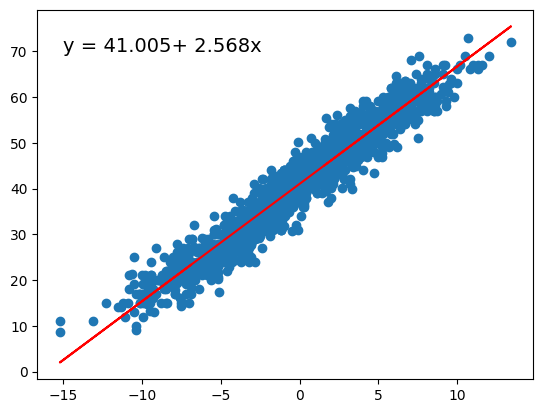

In [181]:
import numpy as np
x = np.array(df["TRtg"])
y = np.array(df["WP82G"])
plt.scatter(x, y)
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b, color = 'red', linestyle = '-')
plt.text(-15, 70, "y = " + "{:.3f}".format(b) + "+ {:.3f}".format(m) + "x", size = 14)


There is a strong correlation between a Total Rating (calculated by Offensive Rating - Defensive Rating), which is equal to point differential after 100 offensive and defensive possessions.  This is not particularly suprising as a team that score a lot of points and don't allow many points will have a high Total Rating and thus should win more games.

Text(80, 80, 'y2 = 42.337+ -0.013x')

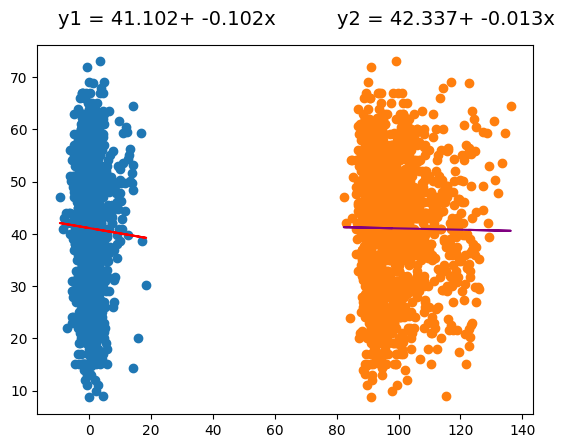

In [182]:
x = np.array(df["Rel_Pace"])
y = np.array(df["WP82G"])
x2 = np.array(df["Pace"])
plt.scatter(x, y)
plt.scatter(x2,y)
m, b = np.polyfit(x, y, 1)
m2, b2 = np.polyfit(x2, y, 1)
plt.plot(x, m*x + b, color = 'red', linestyle = '-')
plt.plot(x2, m2*x2 + b2, color = 'purple', linestyle = '-')
plt.text(-10, 80, "y1 = " + "{:.3f}".format(b) + "+ {:.3f}".format(m) + "x", size = 14)
plt.text(80, 80, "y2 = " + "{:.3f}".format(b2) + "+ {:.3f}".format(m2) + "x", size = 14)

Pace of play is an estimate of the number of possessions per 48 minutes. Relative pace of play is the team's possessions per 48 minutes.  The shot clock in the NBA is 24 seconds, meaning that after inbounding the ball or acquiring possession via steal, block, etc. teams have 24 seconds to produce a shot that hits the rim.  Teams with a high pace take shots earlier in the 24 second period compared to teams with a slow pace.  What the graph suggests is that pace is a poor determiner of how many games a team wins.  Pace is an extremely poor estimator and the reason for this is probably because pace of play has changed over time.

In [ ]:
#lakers = df.iloc[["Team"] == "Los Angeles Lakers"]
#df = df.loc[df["season"] != "2022-23"]
#df.plot.line(x = df["season"], y=df["Pace"])

Text(100, 80, 'y = 112.573+ -0.686DRtg')

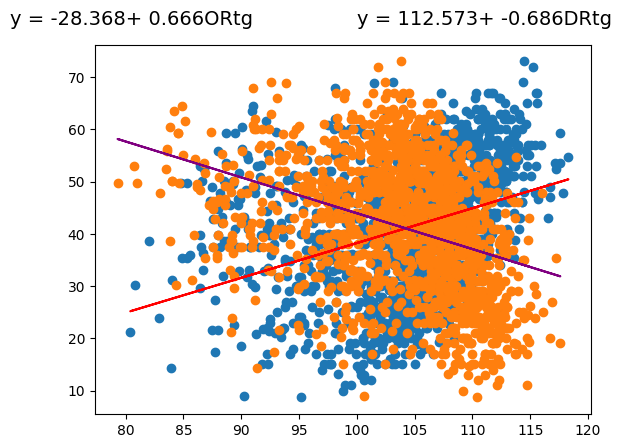

In [189]:
x1 = np.array(df["ORtg"])
x2 = np.array(df["DRtg"])
y = np.array(df["WP82G"])
plt.scatter(x1, y)
plt.scatter(x2, y)
m1, b1 = np.polyfit(x1, y, 1)
m2, b2 = np.polyfit(x2, y, 1)
plt.plot(x1, m1*x1 + b1, color = 'red', linestyle = '-')
plt.plot(x2, m2*x2 + b2, color = 'purple', linestyle = '-')
plt.text(70, 80, "y = " + "{:.3f}".format(b1) + "+ {:.3f}".format(m1) + "ORtg", size = 14)
plt.text(100, 80, "y = " + "{:.3f}".format(b2) + "+ {:.3f}".format(m2) + "DRtg", size = 14)

Defensive efficiency appears to be slightly better at predicting wins compared to offensive deficiency.  The saying "Defense wins championships" may be right, but there are plenty of teams with strong defense

Text(0, 80, 'y = 40.945+ -2.937DRtg')

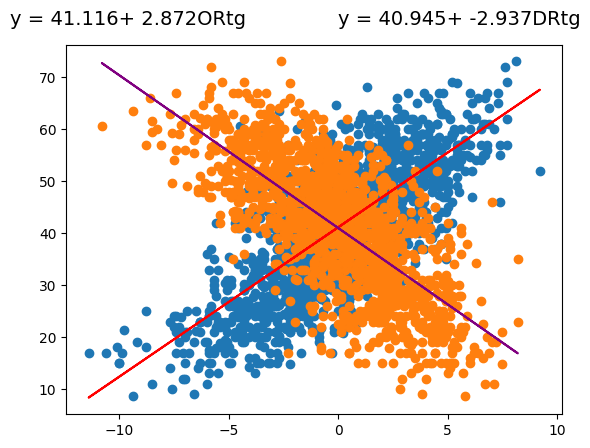

In [191]:
x1 = np.array(df["Rel_ORtg"])
x2 = np.array(df["Rel_DRtg"])
y = np.array(df["WP82G"])
plt.scatter(x1, y)
plt.scatter(x2, y)
m1, b1 = np.polyfit(x1, y, 1)
m2, b2 = np.polyfit(x2, y, 1)
plt.plot(x1, m1*x1 + b1, color = 'red', linestyle = '-')
plt.plot(x2, m2*x2 + b2, color = 'purple', linestyle = '-')
plt.text(-15, 80, "y = " + "{:.3f}".format(b1) + "+ {:.3f}".format(m1) + "ORtg", size = 14)
plt.text(0, 80, "y = " + "{:.3f}".format(b2) + "+ {:.3f}".format(m2) + "DRtg", size = 14)

The relative offensive/defensive ratings are much stronger predictors of how strong a team is compared to the regular offensive and defensive efficiency ratings.

If time compare year vs offensive/defensive ratings

Text(0, 0.5, 'Offensive/Defensive Efficiency Rating')

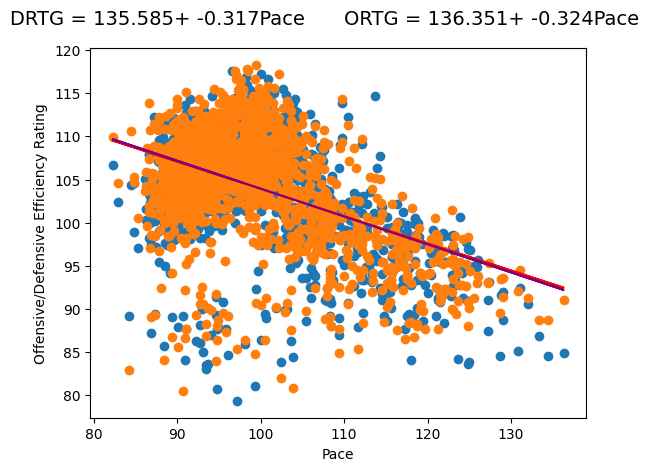

In [202]:
x = np.array(df["Pace"])
y1 = np.array(df["DRtg"])
y2 = np.array(df["ORtg"])
plt.scatter(x, y1)
plt.scatter(x, y2)
m1, b1 = np.polyfit(x, y1, 1)
m2, b2 = np.polyfit(x, y2, 1)
plt.plot(x, m1*x + b1, color = 'red', linestyle = '-')
plt.plot(x, m2*x + b2, color = 'purple', linestyle = '-')
plt.text(70, 123, "DRTG = " + "{:.3f}".format(b1) + "+ {:.3f}".format(m1) + "Pace", size = 14)
plt.text(110, 123, "ORTG = " + "{:.3f}".format(b2) + "+ {:.3f}".format(m2) + "Pace", size = 14)
plt.xlabel("Pace")
plt.ylabel("Offensive/Defensive Efficiency Rating")

This is interesting because it was shown that pace and wins are weakly correlated, but pace and offensive and deficiency ratings are, and offensive and deficiency ratings are strongly correlated with how many games a team wins.